In [1]:
!wget https://www.dropbox.com/s/webw4cr5dsnm3jv/iris1.csv

--2021-02-07 10:13:40--  https://www.dropbox.com/s/webw4cr5dsnm3jv/iris1.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/webw4cr5dsnm3jv/iris1.csv [following]
--2021-02-07 10:13:41--  https://www.dropbox.com/s/raw/webw4cr5dsnm3jv/iris1.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf3fc694edd18264f0912cdd41d.dl.dropboxusercontent.com/cd/0/inline/BIcdunYBWmaFzUeLK3plLP1zGBOZy8JSo9RxfQ8ab2dS01ToLPUVpnoPUdA1xyi3cAYf8AK6iuF8tGqgND-KjS_tMdFgSBKJK5G0X6H4xlZY7tjS1hbBygJyDVGreUT9ylE/file# [following]
--2021-02-07 10:13:41--  https://ucf3fc694edd18264f0912cdd41d.dl.dropboxusercontent.com/cd/0/inline/BIcdunYBWmaFzUeLK3plLP1zGBOZy8JSo9RxfQ8ab2dS01ToLPUVpnoPUdA1xyi3cAYf8AK6iuF8tGqgND-KjS_tMdFgSBKJK5G0X6H4xlZY7tjS1hbBygJy

In [2]:
import pandas as pd
import numpy as np

In [3]:
iris = pd.read_csv('/content/drive/My Drive/iris1.csv')

In [4]:
iris.count()

sepal length (cm)    150
sepal width (cm)     120
petal length (cm)     82
petal width (cm)     150
Class                150
dtype: int64

In [5]:
iris.shape

(150, 5)

In [6]:
iris.info

<bound method DataFrame.info of      sepal length (cm)  sepal width (cm)  ...  petal width (cm)           Class
0                  5.1               3.5  ...               0.2     Iris-Setosa
1                  4.9               3.0  ...               0.2     Iris-Setosa
2                  4.7               3.2  ...               0.2     Iris-Setosa
3                  4.6               3.1  ...               0.2     Iris-Setosa
4                  5.0               NaN  ...               0.2     Iris-Setosa
..                 ...               ...  ...               ...             ...
145                6.7               3.0  ...               2.3  Iris-Virginica
146                6.3               2.5  ...               1.9  Iris-Virginica
147                6.5               3.0  ...               2.0  Iris-Virginica
148                6.2               NaN  ...               2.3  Iris-Virginica
149                5.9               3.0  ...               1.8  Iris-Virginica

[150 ro

In [7]:
iris['sepal length (cm)'].loc[iris['sepal length (cm)']=='?']

Series([], Name: sepal length (cm), dtype: float64)

In [8]:
print('Total null values are:', iris.isnull().sum())

Total null values are: sepal length (cm)     0
sepal width (cm)     30
petal length (cm)    68
petal width (cm)      0
Class                 0
dtype: int64


In [9]:
iris['sepal width (cm)'].replace(np.nan,iris['sepal width (cm)'].mean(),inplace=True)
iris['sepal width (cm)']

0      3.5000
1      3.0000
2      3.2000
3      3.1000
4      3.0575
        ...  
145    3.0000
146    2.5000
147    3.0000
148    3.0575
149    3.0000
Name: sepal width (cm), Length: 150, dtype: float64

In [10]:
for column in list(iris.columns):
  if iris[column].isnull().sum()>(0.40*150):
    iris.drop(columns=column, axis=1,inplace=True)
  elif iris[column].isnull().sum():
    iris[column].replace(np.nan,iris[column].mean(),inplace=True)
  else:
    continue
iris


,sepal length (cm),sepal width (cm),petal width (cm),Class
0,5.1,3.5000,0.2,Iris-Setosa
1,4.9,3.0000,0.2,Iris-Setosa
2,4.7,3.2000,0.2,Iris-Setosa
3,4.6,3.1000,0.2,Iris-Setosa
4,5.0,3.0575,0.2,Iris-Setosa
...,...,...,...,...
145,6.7,3.0000,2.3,Iris-Virginica
146,6.3,2.5000,1.9,Iris-Virginica
147,6.5,3.0000,2.0,Iris-Virginica
148,6.2,3.0575,2.3,Iris-Virginica


In [11]:
iris.info 

<bound method DataFrame.info of      sepal length (cm)  sepal width (cm)  petal width (cm)           Class
0                  5.1            3.5000               0.2     Iris-Setosa
1                  4.9            3.0000               0.2     Iris-Setosa
2                  4.7            3.2000               0.2     Iris-Setosa
3                  4.6            3.1000               0.2     Iris-Setosa
4                  5.0            3.0575               0.2     Iris-Setosa
..                 ...               ...               ...             ...
145                6.7            3.0000               2.3  Iris-Virginica
146                6.3            2.5000               1.9  Iris-Virginica
147                6.5            3.0000               2.0  Iris-Virginica
148                6.2            3.0575               2.3  Iris-Virginica
149                5.9            3.0000               1.8  Iris-Virginica

[150 rows x 4 columns]>

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
iris['Class']=le.fit_transform(iris['Class'])
print(iris.head())
print(iris['Class'].unique())

   sepal length (cm)  sepal width (cm)  petal width (cm)  Class
0                5.1            3.5000               0.2      0
1                4.9            3.0000               0.2      0
2                4.7            3.2000               0.2      0
3                4.6            3.1000               0.2      0
4                5.0            3.0575               0.2      0
[0 1 2]


In [13]:
iris.count

<bound method DataFrame.count of      sepal length (cm)  sepal width (cm)  petal width (cm)  Class
0                  5.1            3.5000               0.2      0
1                  4.9            3.0000               0.2      0
2                  4.7            3.2000               0.2      0
3                  4.6            3.1000               0.2      0
4                  5.0            3.0575               0.2      0
..                 ...               ...               ...    ...
145                6.7            3.0000               2.3      2
146                6.3            2.5000               1.9      2
147                6.5            3.0000               2.0      2
148                6.2            3.0575               2.3      2
149                5.9            3.0000               1.8      2

[150 rows x 4 columns]>

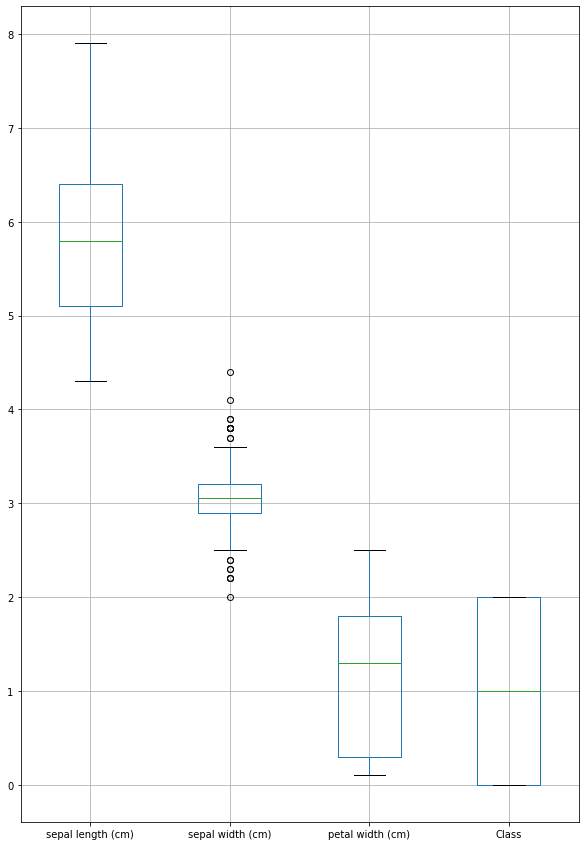

In [14]:
import matplotlib.pyplot as plt
iris.boxplot(figsize=(10,15))
plt.show()

In [15]:
q1 = iris['sepal width (cm)'].quantile(.25)
q3 = iris['sepal width (cm)'].quantile(.75)
IQR = q3-q1
iris['sepal width (cm)'] = np.clip(iris['sepal width (cm)'],q1-1.5*IQR, q3+1.5*IQR)

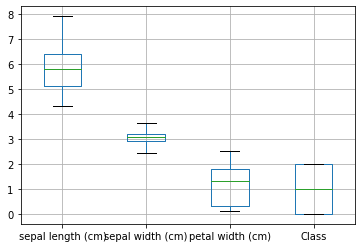

In [16]:
iris.boxplot()
plt.show()

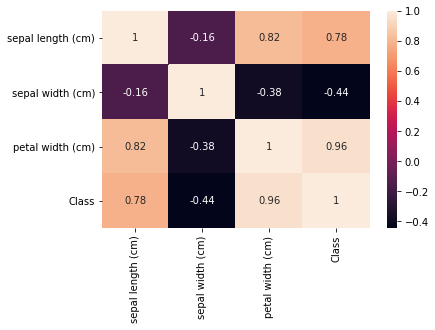

In [18]:
import seaborn as sns
correlation = iris.corr()
sns.heatmap(correlation, annot = True)

In [19]:
import seaborn as sns
correlation= iris.corr()
correlation

,sepal length (cm),sepal width (cm),petal width (cm),Class
sepal length (cm),1.000000,-0.155890,0.817941,0.782561
sepal width (cm),-0.155890,1.000000,-0.377261,-0.444903
petal width (cm),0.817941,-0.377261,1.000000,0.956547
Class,0.782561,-0.444903,0.956547,1.000000


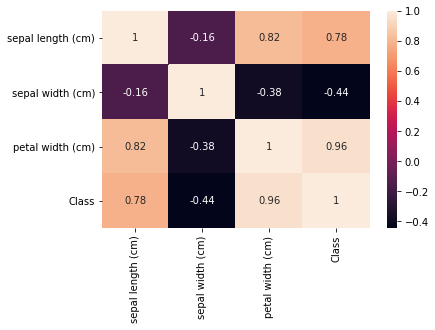

In [21]:
sns.heatmap(correlation, annot=True)

In [22]:
X=iris.drop(['Class'],axis=1)
Y=iris['Class']

In [23]:
print("Input for my ML model: \n",X.head())
print("Output for my ML model : \n", Y.head())

Input for my ML model: 
    sepal length (cm)  sepal width (cm)  petal width (cm)
0                5.1            3.5000               0.2
1                4.9            3.0000               0.2
2                4.7            3.2000               0.2
3                4.6            3.1000               0.2
4                5.0            3.0575               0.2
Output for my ML model : 
 0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.25,random_state=7)

In [25]:
#call the model
from sklearn.linear_model import LogisticRegression
lr_model= LogisticRegression()

In [26]:
#Fit the model
clf = lr_model.fit(X_train, Y_train)

In [27]:
X.info

<bound method DataFrame.info of      sepal length (cm)  sepal width (cm)  petal width (cm)
0                  5.1            3.5000               0.2
1                  4.9            3.0000               0.2
2                  4.7            3.2000               0.2
3                  4.6            3.1000               0.2
4                  5.0            3.0575               0.2
..                 ...               ...               ...
145                6.7            3.0000               2.3
146                6.3            2.5000               1.9
147                6.5            3.0000               2.0
148                6.2            3.0575               2.3
149                5.9            3.0000               1.8

[150 rows x 3 columns]>

In [28]:
X['sepal width (cm)']

0      3.5000
1      3.0000
2      3.2000
3      3.1000
4      3.0575
        ...  
145    3.0000
146    2.5000
147    3.0000
148    3.0575
149    3.0000
Name: sepal width (cm), Length: 150, dtype: float64

In [29]:
#Use the fitted model for prediction on test dataset
y_predicted = clf.predict(X_test)
print(y_predicted)

[2 1 0 1 1 0 2 1 0 1 2 1 0 2 0 2 2 2 0 0 1 2 1 1 2 2 1 1 2 2 2 1 0 2 1 0 0
 0]


In [30]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(Y_test,y_predicted))
print(classification_report(Y_test,y_predicted))

[[11  0  0]
 [ 0 11  3]
 [ 0  2 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.85      0.79      0.81        14
           2       0.79      0.85      0.81        13

    accuracy                           0.87        38
   macro avg       0.88      0.88      0.88        38
weighted avg       0.87      0.87      0.87        38



In [31]:
#call the model
from sklearn.tree import DecisionTreeClassifier
dt_model= DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=0)

In [32]:
#fit the model
clf = dt_model.fit(X, Y)

In [33]:
#Use the fitted model for prediction on test dataset
y_predicted = clf.predict(X)
print(y_predicted)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [34]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(Y,y_predicted))
print(classification_report(Y,y_predicted))

[[50  0  0]
 [ 0 49  1]
 [ 0  4 46]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.98      0.95        50
           2       0.98      0.92      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score

In [36]:
print('Accuracy:', accuracy_score(Y, y_predicted))
print('f1_score:', f1_score(Y, y_predicted,pos_label='positive',average='micro'))
print('recall_score:', recall_score(Y, y_predicted,pos_label='positive',average='micro'))
print('precision_score:', precision_score(Y, y_predicted,pos_label='positive',average='micro'))

Accuracy: 0.9666666666666667
f1_score: 0.9666666666666667
recall_score: 0.9666666666666667
precision_score: 0.9666666666666667


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [40]:
from sklearn.ensemble import AdaBoostClassifier

In [56]:
#Create Ada boost Classifier
abc = AdaBoostClassifier(n_estimators = 50, learning_rate =1)

#Train Adaboost Classifier

model = abc.fit(X_train, Y_train)

#Predict the response for test dataset

y_pred = model.predict(X_test)

In [57]:
print('Accuracy of Ada Boost Classifier:', accuracy_score(Y_test, y_pred))

Accuracy of Ada Boost Classifier: 0.8947368421052632


Applying Adaboost with Decision Tree as Base estimator

In [52]:
from sklearn.svm import SVC
from sklearn import metrics

svc= SVC(probability=True, kernel = 'linear')

#Create Ada boost Classifier
abc = AdaBoostClassifier(n_estimators = 50, base_estimator= dt_model, learning_rate =1)

#Train Adaboost Classifier

model = abc.fit(X_train, Y_train)

#Predict the response for test dataset

y_pred = model.predict(X_test)

In [53]:
print('Accuracy of Ada Boost Classifier with Decision Tree model as base estimator:', accuracy_score(Y_test, y_pred))

Accuracy of Ada Boost Classifier with svc as base estimator: 0.8947368421052632


In [37]:
#importing necessary packages
import pandas as pd
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from sklearn import tree

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


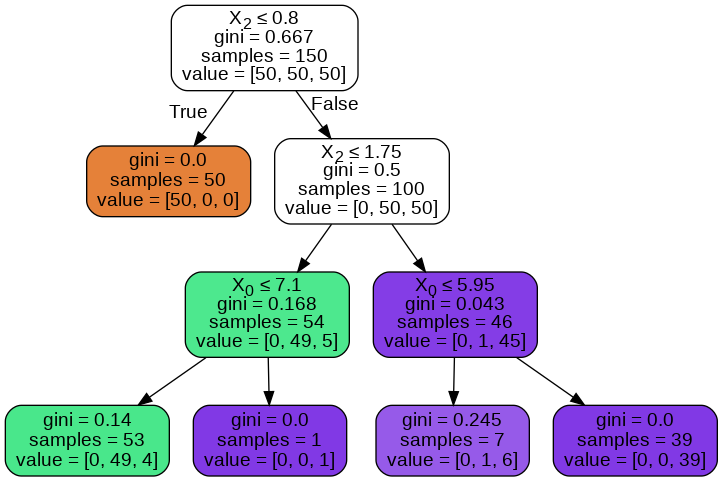

In [39]:
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=None,  
                         class_names=None,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())